Convolutional Neural Networks (CNNs) are particularly well-suited for image classification tasks due to their ability to automatically learn spatial hierarchies of features from raw pixel data, making them ideal for recognizing patterns in visual information [1]. The objective of this report is to evaluate four different CNN architectures for classifying playing card suits into one of five categories: Clubs, Hearts, Spades, Diamonds, or Joker. Two of the selected models are well-known architectures (ResNet and Inception), and the rest were arbitrarily defined, with one being inspired on the LeNet architecture and the other being built with hyperparameter research. All models were coded in Python using the Keras framework, which provides a high-level interface for building and training neural networks.

This analysis is based on a publicly available dataset of playing card images from Kaggle [2], prepared through preprocessing steps designed to streamline the classification task and retain critical features for accurate recognition. By comparing different CNN architectures, this report seeks to identify the most effective model based on confusion matrix metrics (e.g., accuracy and F1-Score), comparing scores to highlight their benefits and drawbacks. Additional criteria, such as performance and storage size, will also be considered to provide actionable insights for model optimization. Moreover, to further enrich the analysis, additional tests were conducted using variations of the presented models. All code used in the analysis can be found in the Appendices section of the report.

# Preprocessing and Data Augmentation
To ensure the dataset was fully optimized for the CNN models, preprocessing steps and targeted data augmentation techniques were implemented. These preparations included scaling pixel values for normalization, converting images to grayscale to emphasize shape and texture while reducing computational load, and adapting the dataset for compatibility with pre-trained architectures. Additionally, data augmentation was selectively applied to address the significant underrepresentation of the Joker class, ensuring a fairer evaluation of model performance. These steps provided a foundation for accurate and efficient analysis while tailoring the data to meet the study's objectives.

## Data Scaling
Since the dataset contains images, the first step in preprocessing was to ensure that the images were formatted correctly for the models. As two of the models used in this analysis (ResNet and Inception) are pre-trained architectures, they require specific input preprocessing. For these models, the images were scaled using the 'resnet_v2.preprocess_input' function, which normalizes the pixel values by scaling them between -1 and 1 [3]. This preprocessing step is crucial for ensuring that the input data is compatible with the pre-trained weights, enabling accurate predictions.

For the two custom models, a simple normalization technique was applied to scale the pixel values to a range between 0 and 1. This transformation is important to prevent issues where CNN models may struggle with large or non-standardized input values, potentially leading to inaccuracies during model training and predictions.

## Channel Adjustments
As part of preprocessing, all images in the dataset were converted from their original RGB format to grayscale. This adjustment emphasizes shape and texture over color, aligning with the study's objective of evaluating CNN models while preserving critical visual patterns required for accurate suit classification. The conversion also reduces computational complexity, allowing for more efficient processing without compromising the model's ability to distinguish between card suits. Since the pre-trained models (ResNet and Inception) expect three color channels, the grayscale images were adapted by replicating the single channel across all three, ensuring these models could work properly with the transformed data.

## Data Augmentation
Data augmentation was tested as a technique to address the class imbalance for the underrepresented Joker class. By applying transformations such as rotation and flipping, four variations of each Joker image were added to the dataset, increasing the class's representation from 1.53% to 7.22%. Despite the improvement in the Joker class, the overall performance of the models decreased with the inclusion of augmented data. Specifically, the accuracy for the Hearts, Clubs, Spades, and Diamonds classes was negatively impacted, which led to the decision to exclude data augmentation from the general analysis. However, data augmentation will only be used in the analysis with the best model selected, to evaluate whether it can improve performance with additional data.

# Convolutional Neural Networks Models

Specialized for visual data processing, Convolutional Neural Networks (CNNs) are designed to process and analyze visual data efficiently. They leverage convolutional layers to extract spatial features, such as edges, textures, and shapes, which are then combined in deeper layers to identify more complex patterns. This hierarchical feature extraction enables CNNs to generalize well for diverse image-based tasks, including classification, detection, and segmentation [4]. Key advantages of these models include their ability to reduce the number of parameters compared to fully connected networks and their adaptability to various image sizes and structures, making them both computationally efficient and highly effective for image recognition challenges.

This report examines two well-established CNN architectures, ResNet and Inception, both of which were fine-tuned with pre-trained weights from the ImageNet dataset. These models were adapted to the current classification problem using Transfer Learning, a technique that leverages existing knowledge from large-scale datasets to solve specific tasks. To tailor these pre-trained models for playing card suit classification, a dense layer with a softmax activation function was appended to each architecture, outputting the probabilities for each class. During training, only this newly added layer was updated while preserving the original pre-trained layers, ensuring efficiency and maintaining the benefits of the pre-trained weights.

In addition to the pre-trained models, two custom CNN architectures were developed for this analysis. One of these models draws inspiration from the classic LeNet architecture, while the other was designed through exploratory hyperparameter tuning. Both architectures were arbitrarily chosen with specific objectives in mind: to create lightweight models with a storage size of no more than 2 MB and to ensure they could be trained efficiently within a maximum time of three minutes. These considerations highlight the balance between simplicity and performance in scenarios where computational resources or storage capacity may be limited.

All models in this analysis were compiled using the Cross-Entropy loss function, and a batch size of 128 was selected for consistency across all architectures. This batch size was determined to be the optimal value during hyperparameter tuning for the custom model, ensuring efficient and reliable training. Each model was trained for a specific number of epochs, tailored to balance performance and training time, with the pre-trained models requiring less than half the epochs of the custom models due to their use of pre-existing weights. For the loaded models, the Adam optimizer was used with a default learning rate of $1 \times 10^{-3}$, a standard choice for these architectures. This consistent configuration contributed to the effective training of both the loaded and custom CNN models.

When evaluating the performance of CNN models for multi-class image classification, the confusion matrix is an essential tool. It provides a summary of correct and incorrect predictions for each class, helping to assess model accuracy [5]. Metrics derived from the confusion matrix include: 

- Accuracy: the ratio of correctly predicted instances to total instances; 
- Precision: measure how accurate the positive predictions are; 
- Recall: evaluate the model's ability to identify positive instances; 
- F1-Score: the harmonic mean of precision and recall, evaluating the reliability of the model;
- Macro Average: the average of the precision, recall, and F1-score across all classes, treating each class equally regardless of its frequency in the dataset;
- Micro Average: the overall average of precision, recall, and F1-score, calculated by considering the total number of true positives, false positives, and false negatives across all classes.

For consistency, all table scores in this analysis, presented in the respective Model Scores subsections for each CNN, are rounded to two decimal places, as per the default setting of the 'classification_report' function in scikit-learn. Accuracy scores, on the other hand, were rounded to four decimal places and expressed as percentages to facilitate comprehension. This approach ensures an objective comparison of performance across the models and highlights key strengths or weaknesses in their classification abilities.

## Inception
The Inception model, developed by Google, is a deep convolutional neural network known for its efficiency in handling large datasets and complex image classification tasks. It uses multiple types of convolutional filters at each layer, enabling it to capture both fine-grained and abstract features from images. The model also incorporates a unique architectural approach, combining convolutions with different filter sizes, which helps it learn more diverse patterns from the data [6].

One of the main advantages of using the Inception model in this context is its ability to balance computational cost with accuracy. Its multi-path architecture allows the model to process information more efficiently, making it a suitable choice for real-time applications. Compared to simpler architectures, Inception can better generalize to a wide variety of image classifications without requiring excessive computational resources.

### Keras Application
The model was implemented using the Keras API, which provides a high-level interface for building and training neural networks. Specifically, the third version of Inception (InceptionV3) was employed, incorporating several improvements over its predecessors, such as more efficient convolutional layers and enhanced feature extraction capabilities. For this task, the InceptionV3 architecture was adapted to classify playing card suits by adding a new final layer to output the probability distribution for the five card suits. 

The pre-trained layers of the model remained frozen during training to retain the knowledge from ImageNet, ensuring efficient training and preserving performance, while the model's inputs were adjusted to accommodate grayscale images. Additionaly, it features over 22 million parameters, with approximately 1.2% of them trainable. These trainable parameters correspond exclusively to the newly added layers for classification, allowing for a lightweight yet effective adaptation. Its size of 84 MB includes 1 MB allocated to the trainable parameters.

### Model Scores

**Total Accuracy (Test Set) = 77.36%.**

| Suit      | Precision |  Recall  | F1-Score   |  Support |
| --------  | ------   | ---------  | -------- | -------- |
| Clubs     |  0.96    |   0.75     |   0.84    |    65   |
| Diamonds  |   0.91   |   0.75    |   0.82   |     65  |
| Hearts    |   0.62   |   0.97    |   0.76    |    65  |
| Joker     |  0.00    |  0.00     |   0.00    |     5   |
|  Spades   |    0.75  |    0.68   |    0.71    |    65 |
| --------  | ------   | --------- | -------- | -------- |
|   Macro Avg.   |   0.65  |   0.63    |  0.63   |    265 |
| Weighted Avg.   |    0.79  |    0.77   |   0.77  |   265 |

## ResNet
ResNet, short for Residual Networks, is a groundbreaking CNN architecture designed to address the vanishing gradient problem often encountered in deep neural networks. The architecture introduces residual learning, where shortcut connections allow gradients to flow more efficiently during backpropagation [7]. This innovation enables the construction of very deep networks, making ResNet highly effective for complex image classification tasks.

One of the key advantages of ResNet is its scalability and robustness. By stacking residual blocks, it achieves high performance without the degradation problem commonly observed in deep networks. ResNet has been widely adopted in various domains, including medical imaging, autonomous driving, and facial recognition, demonstrating its versatility and effectiveness across diverse applications.

### Keras Application
The ResNet50V2 model was implemented using the Keras API. This version of ResNet incorporates several enhancements, such as better gradient flow through batch normalization before activation, improving training efficiency. For this task, the ResNet50V2 architecture was adapted to classify playing card suits by adding a final dense layer to output the probability distribution for the five suits. Similar to the Inception model, the inputs were adjusted to receive grayscale images, and the pre-trained layers were frozen during training to retain the benefits of the ImageNet weights, allowing the model to focus on learning the task-specific features.

The model features over 24 million parameters, of which approximately 2.1% are trainable. These trainable parameters correspond exclusively to the added layers for the classification task, ensuring a fine-tuned approach while maintaining the efficiency of the pre-trained architecture. Its size of 91.81 MB includes 1.91 MB allocated to the trainable parameters.

### Model Scores

**Total Accuracy (Test Set) = 87.55%.**

| Suit      | Precision |  Recall  | F1-Score   |  Support |
| --------  | ------   | ---------  | -------- | -------- |
| Clubs     |  0.77    |   0.97     |   0.86    |    65   |
| Diamonds  |   0.92   |   0.89    |   0.91   |     65  |
| Hearts    |   0.88   |   0.89    |   0.89    |    65  |
| Joker     |  0.00    |  0.00     |   0.00    |     5   |
|  Spades   |    1.00  |    0.82   |    0.90    |    65 |
| --------  | ------   | --------- | -------- | -------- |
|   Macro Avg.   |   0.71  |   0.71    |  0.71   |    265 |
| Weighted Avg.   |    0.88  |    0.88   |   0.87  |   265 |

## Adapted Model
The first custom CNN model was designed arbitrarily, drawing inspiration from the AlexNet architecture while maintaining a compact structure. It consists of three convolutional layers paired with max-pooling operations to progressively learn different aspects from the grayscaled card images. These blocks are followed by fully connected dense layers that process the extracted features and ultimately output probabilities for each of the five card suits. The architecture was purposefully kept simple to align with the goal of creating a lightweight and fast model. 

With a total of approximately 290,000 parameters, the model requires just over 1 MB of storage. Its simplicity ensures efficient training within minutes, making it suitable for resource-constrained environments and very effective to handle the classification task while demonstrating the feasibility of a smaller-scale neural network for image-based recognition problems.

### Hyperparameter tuning
The hyperparameter tuning for this custom CNN model focused on selecting the best optimizer. To perform the search, the model was converted to a Sklearn-compatible format, enabling the use of GridSearchCV for an efficient and systematic search. A total of 15 combinations were explored, with three different optimizers available for Keras models: Adam, RMSProp, and SGD; Paired with five different learning rates (expressed in scientific notation): $5 \times 10^{-3}, 1 \times 10^{-3}, 5 \times 10^{-4}, 1 \times 10^{-4}, 5 \times 10^{-5}$. For each combination, three validation runs were conducted to ensure robust evaluation.

This tuning process aimed to identify the optimal optimizer and learning rate combination to enhance the model's performance while ensuring stability during training. The results of the research revealed that larger learning rates generally led to better performance. Additionally, Adam and RMSProp optimizers outperformed SGD in terms of both speed and accuracy, with Adam providing a slight edge over RMSProp in overall performance.

### Model Scores

**Total Accuracy (Test Set) = 93.58%.**

| Suit      | Precision |  Recall  | F1-Score   |  Support |
| --------  | ------   | ---------  | -------- | -------- |
| Clubs     |  0.94    |   0.98     |   0.96    |    65   |
| Diamonds  |   0.94   |   0.91    |   0.82   |     65  |
| Hearts    |   0.91   |   0.89    |   0.90    |    65  |
| Joker     |  0.67    |  0.80     |   0.73    |     5   |
|  Spades   |    0.98  |    0.97   |    0.71    |    65 |
| --------  | ------   | --------- | -------- | -------- |
|   Macro Avg.   |   0.89  |   0.91    |  0.90   |    265 |
| Weighted Avg.   |    0.94  |    0.94   |   0.94  |   265 |

## Hyperparameter-tuned Model
The second custom model was designed to explore the impact of hyperparameter tuning on a CNN architecture tailored for playing card classification. Unlike the first adapted model, this architecture allowed for flexibility in key structural parameters, such as the number of convolutional blocks, filters, kernel sizes, strides, padding, and dense layer configurations. Each block, comprising a convolutional layer and a max-pooling operation, aimed to progressively extract and downsample features from the grayscale card images, while the dense layers refined these features to output the final classification. 

The best-performing configuration selected during hyperparameter tuning resulted in a model slightly smaller than the Adapted Model by approximately 63,000 parameters, maintaining a compact size of less than 1 MB, ensuring efficiency in both training and inference. Its refined architecture highlights the potential for tailoring CNNs to optimize performance while balancing resource constraints.

### Hyperparameter tuning
The hyperparameter tuning processes were conducted using RandomizedSearchCV (an Sklearn function) with a set of 20 combinations, validated in 3 iterations. The initial search explored a wide range of hyperparameters, with 1728 possible combinations, including variations in filter sizes, kernel sizes, stride values, dense layer sizes, and batch sizes. In the second search, this was narrowed down by focusing on a more specific subset of parameters, particularly selecting larger filter sizes and denser layers, while reducing the batch size range. This subset contained 128 possible combinations. By narrowing the focus, the second search streamlined the process and led to a more refined configuration that optimized the model's performance further. The best-performing configuration from this process resulted in a model with three convolutional blocks, each containing six filters, followed by a dense layer with 48 perceptrons.

### Model Scores

**Total Accuracy (Test Set) = 84.53%.**

| Suit      | Precision |  Recall  | F1-Score   |  Support |
| --------  | ------   | ---------  | -------- | -------- |
| Clubs     |  0.87    |   0.92     |   0.90    |    65   |
| Diamonds  |   0.84   |   0.78    |   0.81   |     65  |
| Hearts    |   0.81   |   0.88    |   0.84    |    65  |
| Joker     |  0.80    |  0.80     |   0.80    |     5   |
|  Spades   |    0.87  |    0.80   |    0.83    |    65 |
| --------  | ------   | --------- | -------- | -------- |
|   Macro Avg.   |   0.84  |   0.84    |  0.84   |    265 |
| Weighted Avg.   |    0.85  |    0.85   |   0.84  |   265 |

# Model Comparison and Adaptations

A seed was set during the training and evaluating processes to ensure deterministic results, addressing the inherent randomness in CNN operations. This section focuses on comparing the performance of the models tested in this analysis, based on their confusion matrix metrics and training time. Additionally, a few extra tests were conducted using two variations of the Adapted model and one variation of the ResNet model, further enriching the comparative analysis. This comparison underscores the strengths and limitations of each model, providing a comprehensive evaluation of their performance in this contexto (i.e., classifying suits of playing cards).

Among the custom models, the Adapted model demonstrated superior performance, achieving the highest accuracy and consistently robust metrics across the majority of classes. It excelled particularly in handling the dominant classes, showcasing precision and recall values close to optimal, with F1-Score being above 90% for these classes. Meanwhile, the Hyperparameter-tuned model, despite achieving a slightly lower overall accuracy, demonstrated better performance for the underrepresented Joker class. However, given the limited size of the Joker test set, with only five samples, this result cannot be considered definitive. Further tests with data augmentation to balance the suits distribution would be necessary to assess the consistency of these findings, especially in scenarios where equitable treatment of all classes is a priority.

As for the pre-trained models, ResNet emerged as the stronger of the two, achieving higher accuracy and better metrics overall compared to Inception. However, both models faced significant challenges with the heavily imbalanced Joker class, with ResNet failing to make any correct predictions for it. While Inception's balanced recall for certain classes was notable, its lower overall performance and lack of generalization to underrepresented data highlighted its limitations in this context. By using residual connections to update its weights, ResNet addresses key training challenges inherent to deep models, making it well-suited for the objectives and complexities discussed in this report.

When comparing the models overall, the adapted custom model consistently outperformed all others, establishing itself as the most robust option for this dataset. Its ability to deliver high accuracy and balanced class performance, particularly in the face of data imbalance, underscores its suitability for this task. The pre-loaded models, while efficient in leveraging pre-trained weights, struggled to adapt to the dataset's specific challenges, especially for minority classes. Moreover, the custom models demonstrated greater efficiency during the training process, contrasting with the pre-trained models, which required more extensive computational resources and time to achieve the results. Ultimately, the Adapted model's performance highlights the value of tailoring a model specifically to the dataset's characteristics, making it the strongest candidate for the given task.

## Exploring Variations
Testing variations of the models presented in this report was a key step to enrich the analysis and derive meaningful insights into their performance under different conditions. These tests aimed to address specific challenges such as class imbalance and input data format, providing a deeper understanding of how these factors influence model outcomes. By exploring these variations, we were able to identify strengths, limitations, and opportunities for further optimization.

The first variation tested involved training the Adapted model on a dataset enhanced with augmented images to address the class imbalance, particularly for the Joker suit. This approach increased in four times the representation of the Joker class, allowing the model to better recognize its features. While the augmented data improved the model's ability to identify the Joker class, the overall performance for the other classes showed minor trade-offs, reflecting the challenges of balancing precision across a more equitable distribution. Despite these shifts, the test highlighted the benefits of data augmentation in addressing class underrepresentation, and with appropriate adjustments to its parameters, this model could achieve better results for the Joker class while maintaining its effectiveness in classifying the other suits.

The second variation tested applied transfer learning to the Adapted model. The initial training phase excluded the Joker suit, focusing solely on the four primary suits to refine the model’s convolutional layers for their distinctive features. Subsequently, the convolutional layers were frozen, and the dense layers were retrained using augmented data specifically for the Joker class. This strategy allowed the model to adapt its classification abilities without compromising the learned representations for the primary suits. 

The results revealed consistent performance for the main classes, while the Joker class achieved a significant improvement in recognition. However, compared to the original Adapted model, this variation showed slightly diminished overall performance for the primary suits. Nonetheless, this two-step process highlighted the potential of transfer learning as a targeted approach for balancing class representation, demonstrating the model's adaptability and providing an alternative for datasets with severe class imbalances.

The third variation used the ResNet model with the original colored images, aligning with its 3-channel input design. While the colored variation showed comparable precision and recall for most classes, its performance for the Joker class remained null, mirroring the grayscale model’s challenges in this regard. Interestingly, the grayscale version demonstrated marginally better handling of imbalanced data, particularly for the Clubs and Spades suits, which showed improved recall and F1-scores. ResNet’s strong baseline performance highlights its potential, but exploring models like Inception with colored images could offer better results for this dataset.

# Key Findings, Insights and Next Steps 

The analysis of CNN models provided significant insights into the classification of playing cards and revealed how different architectures and approaches influence their performance. Among the suits, Clubs consistently achieved the best scores, demonstrating that its features are more distinguishable for the models. Interestingly, despite having the highest representation among the primary suits, Spades often showed the lowest scores, except when using the Adapted model. This suggests that class representation alone is not sufficient, highlighting the importance of tailored model design.

## Visual Analysys
GRAD-CAM visualizations provided a deeper understanding of how each CNN model identifies card suits, offering insights into the decision-making processes of various architectures. By utilizing gradient-weighted class activation mapping, which uses the gradients from the final convolutional layer to highlight important regions in the image for predicting a specific class, these visualizations revealed the areas of focus for each model [8]. Pre-trained models, which rely on RGB input, exhibited variations in channel influence, with certain channels playing a more critical role in their predictions. Among these models, ResNet demonstrated the most precise filters, focusing directly on the card symbols, which aligns with its superior scores.

The Adapted model, in contrast, strategically leveraged the edges of the cards as a key feature in its classifications, showcasing an innovative approach to suit detection. The Hyperparameter-tuned and EfficientNet-based models, however, displayed less definitive patterns in their visualizations, which was reflected in their comparatively lower scores. These observations highlight the diverse ways CNN models process and interpret visual data, emphasizing the importance of architecture-specific optimizations.

## Insights and Future Plans
Custom models showed a clear advantage over pre-trained ones, achieving more balanced predictions across all five classes. While pre-trained models tended to favor a limited number of suits, custom architectures designed specifically for the task produced results that were more evenly distributed, underscoring the value of problem-specific solutions. When incorporating the model variations, further patterns emerged. 

The use of grayscale images proved to be more effective in this context than colored ones, as shape, edges, and borders are the defining features for distinguishing suits. Grayscale images not only improved classification accuracy but also reduced computational complexity and storage requirements. Data augmentation demonstrated its ability to enhance performance for underrepresented classes, like the Joker, but revealed trade-offs that can negatively affect other classes if not carefully adjusted. Similarly, transfer learning proved effective when applied with a well-structured approach, balancing performance across the suits while improving recognition for the Joker class.

The study reinforces that optimizing CNN models for suit classification requires careful calibration of techniques such as data augmentation and transfer learning. Moving forward, exploring refined custom architectures and alternative pre-trained models, such as EfficientNet, could provide additional insights. Future research could also focus on advanced augmentation strategies and improved handling of class imbalances to further enhance the model’s accuracy and adaptability, while extending the analysis to classify cards by their values (14 classes) or by the full set of value and suit combinations (53 classes), leveraging the dataset's potential for broader applications.

# References

[1] Convolutional Neural Networks for Image Classification (2023). *Medium*. Available at https://medium.com/@khwabkalra1/convolutional-neural-networks-for-image-classification-f0754f7b94aa. (Accessed 26 November 2024)

[2] Cards Image Dataset-Classification (2022). *Kaggle*. Available at https://www.kaggle.com/datasets/elvinrustam/imdb-movies-dataset. (Accessed 26 November 2024)

[3] ResNet and ResNetV2. Keras 3 API documentation. *Keras*. Available at https://keras.io/api/applications/resnet/. (Accessed 27 November 2024)

[4] How Convolutional Neural Networks are Revolutionizing Image Recognition (2024). *Trailyn Ventures*. Available at https://www.trailyn.com/how-convolutional-neural-networks-are-revolutionizing-image-recognition/. (Accessed 27 November 2024)

[5] Confusion Matrix in Machine Learning (2024). *GeeksforGeeks*. Available at https://www.geeksforgeeks.org/confusion-matrix-machine-learning/. (Accessed 28 November 2024)

[6] A Review of Popular Deep Learning Architectures: ResNet, InceptionV3, and SqueezeNet (2024). *DigitalOcean*. Available at https://www.digitalocean.com/community/tutorials/popular-deep-learning-architectures-resnet-inceptionv3-squeezenet. (Accessed 28 November 2024)

[7] Residual Networks (ResNet) – Deep Learning (2023). *GeeksforGeeks*. Available at https://www.geeksforgeeks.org/residual-networks-resnet-deep-learning/. (Accessed 29 November 2024)

[8] Interpreting CNN Models (2021). *Medium*. Available at https://towardsdatascience.com/interpreting-cnn-models-a11b1f720097.(Accessed 04 December 2024)

# Appendices

**Main Modules and Helper Functions**

In [1]:
# Dataset page: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification

# Main modules and functions

# Data exploration, manipulation and visualization modules
import numpy as np # Linear Algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image # Image processing
import matplotlib.pyplot as plt # Visualizing data

# Neural Networks modules
import tensorflow as tf
from keras import applications as apps
from keras.models import Model, Sequential
from keras.callbacks import History
from keras.ops import expand_dims
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy 
from keras.optimizers import Adam, RMSprop, SGD
from keras.applications import InceptionV3, ResNet50V2
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate
from keras.preprocessing.image import array_to_img, img_to_array
from keras.layers import RandomFlip, RandomRotation, RandomBrightness, RandomContrast, RandomZoom
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasClassifier

# Other auxiliary modules
from random import seed
from tqdm import tqdm
from math import ceil
from os import getcwd
from warnings import filterwarnings

# Settings the warnings to be ignored 
filterwarnings('ignore')

# Variable that defines the use of Data Augmentation of Joker's images
with_augmentation = False

# Reading CSV file and showing informations about the dataset
df_info = pd.read_csv(getcwd()+'/cards.csv')
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class index  8155 non-null   int64 
 1   filepaths    8155 non-null   object
 2   labels       8155 non-null   object
 3   card type    8155 non-null   object
 4   data set     8155 non-null   object
dtypes: int64(1), object(4)
memory usage: 318.7+ KB


In [2]:
# Based on algorithm presented in: https://keras.io/examples/vision/grad_cam/

# Function that plots a Grad-CAM heatmap after predicting a sample using any model
def gradcam_heatmap(img_array, model, alpha=0.99, get_heatmap=False):

    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = Model(
        model.inputs, [model.get_layer([l.name for l in model.layers if 'conv' in l.name][-1]).output, model.output]
    )

    # Setting the array and the index that will be used to create the heatmap
    base_model = True if 'functional' in model.name else False
    inp_arr = np.copy(img_array)
    if np.max(inp_arr) <= 1 : 
        img_array = np.uint8(255 * img_array)
        if base_model is False:   
            if model.name == 'resnet' : inp_arr = apps.resnet_v2.preprocess_input(inp_arr.reshape(1,224,224,1))  
            if model.name == 'inception' : inp_arr = apps.inception_v3.preprocess_input(inp_arr.reshape(1,224,224,1))
    else:
        if model.name == 'resnet' :
            inp_arr = img_array / 255. if base_model is True \
            else apps.resnet_v2.preprocess_input(inp_arr.reshape(1,224,224,1))
        if model.name == 'inception' : 
            inp_arr = img_array / 255. if base_model is True \
            else apps.inception_v3.preprocess_input(inp_arr.reshape(1,224,224,1))

    if inp_arr.shape == (224,224,1) : inp_arr = np.expand_dims(inp_arr, 0)
    pred_index = np.argmax(model.predict(inp_arr))

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(inp_arr)
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)
    
    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the output class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    # Rescale heatmap to a range 0-255
    heatmap = heatmap.numpy()
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    cm = plt.get_cmap("hot")

    # Use RGB values of the colormap
    cm_colors = cm(np.arange(256))[:, :3]
    cm_heatmap = cm_colors[heatmap]

    # Create an image with RGB colorized heatmap
    cm_heatmap = array_to_img(cm_heatmap)
    cm_heatmap = cm_heatmap.resize((224, 224))
    cm_heatmap = img_to_array(cm_heatmap)

    # If the selected model is an existing model uses 3 color channels in training
    # (e.g. Inception, Resnet -> base_model=False), the heatmap is plotted over the original image, 
    # differentiating each channel. Otherwise, heatmap is plotted only once.
    if base_model is True:
        img = array_to_img((cm_heatmap * alpha + img_array).reshape(224,224,3))
        if get_heatmap is True:
            return img
        else:
            plt.imshow(img, cmap='gray')
            plt.axis('off')
        
    else: 
        
        imgs = [array_to_img((cm_heatmap * alpha + img_array).reshape(224,224,3)),\
                array_to_img((cm_heatmap[:,:,0] * alpha + img_array.reshape(224,224)).reshape(224,224,1)),\
                array_to_img((cm_heatmap[:,:,1] * alpha + img_array.reshape(224,224)).reshape(224,224,1)),\
                array_to_img((cm_heatmap[:,:,2] * alpha + img_array.reshape(224,224)).reshape(224,224,1))]

        plt.figure(figsize=(10, 10))

        plt.subplot(2, 2, 1)
        plt.imshow(imgs[0])
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(2, 2, 2)
        plt.imshow(imgs[1], vmin=0, cmap='hot', vmax=255)
        plt.title("Red Channel")
        plt.axis('off')

        plt.subplot(2, 2, 3)
        plt.imshow(imgs[2], vmin=0, cmap='hot', vmax=255)
        plt.title("Green Channel")
        plt.axis('off')

        plt.subplot(2, 2, 4)
        plt.imshow(imgs[3], vmin=0, cmap='hot', vmax=255)
        plt.title("Blue Channel")
        plt.axis('off')

        plt.show()

In [3]:
# Funtion used to find the hyperparameters for a CNN model using RandomizedSearchCV
def hyperparam_search(model:Model,params:dict,train_set,target,random=True,cv=3,max_comb=20):
    keras_model = KerasClassifier(model=model, loss=CategoricalCrossentropy(), random_state=321) 
    if random is True:
        search = RandomizedSearchCV(estimator=keras_model, param_distributions=params, cv=cv, n_iter=max_comb, random_state=321)
    else:
        search = GridSearchCV(estimator=keras_model, param_grid=params, cv=cv)
    search_result = search.fit(X=train_set, y=target, verbose=0)
    return search_result

# Function used to data augmentation - ONLY USED FOR JOKER
def data_augmentation(data,inds_arr,n):

    def image_aug(image):
        augmented_data = np.array([])
        arr = expand_dims(image, 0)

        data_generator = Sequential([
        RandomFlip("horizontal_and_vertical"),
        RandomContrast(0.1),
        RandomBrightness(0.002),
        RandomRotation(0.02),
        RandomZoom(0.01),
        ]) 

        for _ in range(n) : augmented_data = np.append(augmented_data,data_generator(arr))

        return augmented_data.reshape(n,*image.shape)
    
    augmented_data = np.empty(shape=(len(inds_arr)*4,224,224,1))
    
    for i,inds in enumerate(inds_arr):
        aug_data = image_aug(data[inds])
        augmented_data[(i*4):((i+1)*4)] = aug_data

    return np.append(data,augmented_data,axis=0)

In [4]:
# Function to visualize model's training performance using loss/accuracy socre
def nn_results_visualizer(hist:History,val_data=False,**kwargs):
        
    n_epochs = len(hist.epoch)
    met_list = [m for m in hist.history.keys()]
    n_metrics = len(met_list) if (val_data is False) else int(len(met_list)/2)
    plot_id = 2 if (n_metrics > 1) else 1
    fig = plt.figure(figsize=(12, 6*ceil(n_metrics/2)))
    if kwargs.get('title') is not None : plt.suptitle(kwargs.get('title'))
    
    for i in range(n_metrics):
        metric = met_list[i]
        ax = fig.add_subplot(ceil(n_metrics/2), plot_id, i+1)
        ax.plot(range(1,n_epochs+1), (hist.history[metric]),'r-', label=f"Train {metric}")
        if val_data is True:
            ax.plot(range(1,n_epochs+1), (hist.history['val_'+metric]),'b-', label=f"Validation {metric}")
        ax.legend()
        ax.set_title(f'{metric} over iterations')
        
    plt.show()


# Function to visualize and compare results using 'x_test' set
def results_report(model,**kwargs):

    global x_test, x_test_tl, y_suit, suits_dict

    if kwargs.get("transfer_learning") is True:
        global no_joker_tes
        y_pred  = np.array([get_suit(np.argmax(x)) for x in model.predict(x_test[no_joker_tes])])
        y_test = np.array([get_suit(np.argmax(y)) for y in y_suit['test'][no_joker_tes]])
        classes = list(np.unique(y_test))      

    else:
        if 'functional' in model.name:
            if kwargs.get("augmentation") is True:
                global aug_test
                y_pred  = np.array([get_suit(np.argmax(x)) for x in model.predict(aug_test)])
            else:
                y_pred  = np.array([get_suit(np.argmax(x)) for x in model.predict(x_test)])
        else:
            if kwargs.get("resnet_rgb") is True:
                global rgb_test
                y_pred  = np.array([get_suit(np.argmax(x)) for x in model.predict(rgb_test)])
            else: 
                y_pred  = np.array([get_suit(np.argmax(x)) for x in model.predict(x_test_tl)])

        y_test = np.array([get_suit(np.argmax(y)) for y in y_suit['test']])
        classes = list(suits_dict.keys())
    
    if kwargs.get("augmentation") is True : 
        global y_aug_test
        y_test = np.array([get_suit(np.argmax(y)) for y in y_aug_test])

    # Printing classification report for each class
    print('\n\t\t\t\t\t',f'Total Accuracy (Test Set) = {round(accuracy_score(y_test,y_pred),4)*100}%')
    print('__________________________________________________________________________________________________________','\n')
    print('Test Set Report')
    report = classification_report(y_test, y_pred, target_names=classes)
    print(report)
    print('__________________________________________________________________________________________________________','\n')

    # Displaying confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    if kwargs.get('title') is not None : plt.suptitle(kwargs.get('title'))
    plt.show()

*Preprocessing and Data Cleaning*

In [5]:
# Data cleaning

# OBS.: According to the dataset's descriptions and the count of files downloaded, the dataframe has one invalid row;
# - Its file is identified as 'output' where it should be a '.jpg' archive.
print('Row with invalid filepath','\n')
df_info.loc[df_info['filepaths'].apply(lambda x : len(x.split('.')))==1]

# Data frame treatment
if 'labels' in df_info.columns:

    # Checking the number of class indexes - THIS COLUMN WILL NOT BE USED
    print('Nº of classes (considering value and suit) =',len(np.unique(df_info['class index'])),'\n')

    # Creating 'suit' column
    df_info['suit'] = [s for s in df_info.labels.apply(lambda x : x.split(' of ')[-1])]

    # Changing joker's card type from 'xxx' to 'joker'
    df_info.loc[df_info['card type'] =='xxx','card type'] = 'joker'

    # Selecting the columns that will be used in the analysis
    df_info = df_info.loc[:,['filepaths','data set','card type','suit']]

    print('Nº of classes (considering only suit) =',len(np.unique(df_info['suit'])),'\n')

    print('Nº of classes (considering only value) =',len(np.unique(df_info['card type'])))
    
    # Locating the disposable row and removing it
    miss_ind = df_info.loc[df_info['filepaths'].apply(lambda x : len(x.split('.')))==1].index.values # This function
    df_info = df_info.drop(miss_ind)


df_info.head()

Row with invalid filepath 

Nº of classes (considering value and suit) = 53 

Nº of classes (considering only suit) = 5 

Nº of classes (considering only value) = 14


,filepaths,data set,card type,suit
0,train/ace of clubs/001.jpg,train,ace,clubs
1,train/ace of clubs/002.jpg,train,ace,clubs
2,train/ace of clubs/003.jpg,train,ace,clubs
3,train/ace of clubs/004.jpg,train,ace,clubs
4,train/ace of clubs/005.jpg,train,ace,clubs


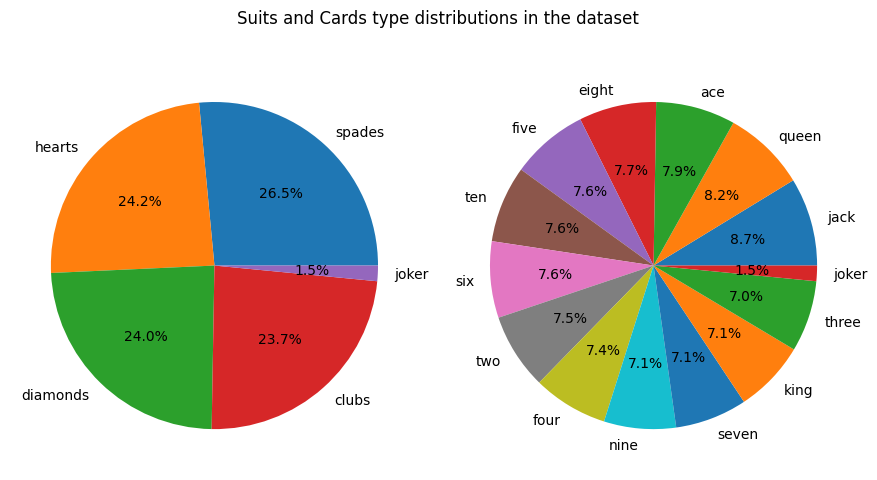

In [6]:
# Plotting suits and cards type distributions

if with_augmentation:
    dist_suit = df_info['suit'].value_counts()
    dist_suit['joker'] += 4*dist_suit['joker']
    dist_suit /= dist_suit.sum()

    dist_type = df_info['card type'].value_counts()
    dist_type['joker'] += 4*dist_type['joker']
    dist_type /= dist_type.sum()

    suits_prop = round(dist_suit*100,2).T
    type_prop = round(dist_type*100,2).T

else:
    suits_prop = round(df_info['suit'].value_counts(normalize=True)*100,2).T
    type_prop = round(df_info['card type'].value_counts(normalize=True)*100,2).T

plt.figure(figsize=[9,5])
plt.suptitle("Suits and Cards type distributions in the dataset")

plt.subplot(1,2,1)
plt.pie(suits_prop,labels=suits_prop.index,  autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.pie(type_prop,labels=type_prop.index,  autopct='%1.1f%%')

plt.tight_layout()
plt.show()

In [7]:
# Function that return agumented dataset with joker cards added
def augmented_dataset():
    n_train = len(df_info.loc[df_info['data set']=='train'])
    n_test = len(df_info.loc[df_info['data set']=='test']) # same length as validation set

    inds_train = df_info.loc[(df_info['card type']=='joker')&(df_info['data set']=='train')].index.values
    inds_test = df_info.loc[(df_info['card type']=='joker')&(df_info['data set']=='test')].index.values - n_train
    inds_val = df_info.loc[(df_info['card type']=='joker')&(df_info['data set']=='valid')].index.values - (n_train + n_test)

    train_aug = data_augmentation(np.load('train.npy'),inds_train,4)
    test_aug = data_augmentation(np.load('test.npy'),inds_test,4)
    val_aug = data_augmentation(np.load('valid.npy'),inds_val,4)

    return train_aug, test_aug, val_aug

if with_augmentation:
    x_train, x_test, x_val = augmented_dataset()
else:
    x_train, x_test, x_val = np.load('train.npy'), np.load('test.npy'), np.load('valid.npy')

In [8]:
# Loading the images as numpy arrays (using .npy files) and normalizing their values (Grays scale: 0 - 255)

# Because keras.applications.inception_v3.preprocess_input makes the same transformation 
# as keras.applications.resnet_v2.preprocess_input, Inception and Resnet models will use the same arrays.

norm = lambda x : x / 255.0

x_train_tl = apps.inception_v3.preprocess_input(np.copy(x_train))
x_train = norm(x_train)

x_test_tl = apps.inception_v3.preprocess_input(np.copy(x_test))
x_test = norm(x_test)

x_val_tl = apps.inception_v3.preprocess_input(np.copy(x_val))
x_val = norm(x_val)

print('Datasets size')
print('Training:',x_train.shape[0])
print('Test:',x_test.shape[0])
print('Validation:',x_val.shape[0])

Datasets size
Training: 7624
Test: 265
Validation: 265


In [9]:
# Defining target sets as dictionaries with keys being their dataset type

def define_y(col,n):

    labels_dict = dict(zip(np.unique(df_info[col]),range(n)))
    y_dict = {}; df_info[col] = df_info[col].map(labels_dict)

    for ds in np.unique(df_info['data set']):
        # Condition used to add data targets if data was augmented
        if with_augmentation:
            if ds == 'train':
                y_dict[ds] = np.append(to_categorical(df_info.loc[df_info['data set']==ds,col],n),\
                np.array([[0., 0., 0., 1., 0.] for _ in range(len(df_info.loc[df_info['data set']==ds]),len(x_train))]),axis=0)
            else:
                y_dict[ds] = np.append(to_categorical(df_info.loc[df_info['data set']==ds,col],n),\
                np.array([[0., 0., 0., 1., 0.] for _ in range(len(df_info.loc[df_info['data set']==ds]),len(x_test))]),axis=0)
        else:
            y_dict[ds] = to_categorical(df_info.loc[df_info['data set']==ds,col],n)

    return y_dict, labels_dict

# Function that locate a card suit based on its index
get_suit = lambda x : list(suits_dict.keys())[list(suits_dict.values()).index(x)]

# Creating numerical target arrays
y_suit, suits_dict = define_y('suit',5)
#y_type, types_dict = define_y('card type',14) -> FUTURE PLANS

# SEPARATING JOKER FROM THE OTHERS - example using y_suit['train']
# NO JOKER   : y_suit['train'][np.where(y_suit['train'][:,3]==0)[0]]
# ONLY JOKER : y_suit['train'][np.where(y_suit['train'][:,3]==1)[0]]

Image array shape =  (224, 224, 1)


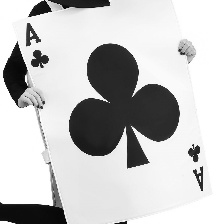

In [10]:
# Plotting first image for test

image = Image.open(df_info.loc[0,'filepaths']).convert('L')
img = Image.fromarray(np.uint8(image))

arr = np.array(img)
arr = np.expand_dims(arr, axis=0).reshape((224,224,1))

print('Image array shape = ',arr.shape)

img

**CNN MODELS**

*ADAPTED MODEL*

In [11]:
# Neural Network for tests - Adapted model from LeNet architecture

def adapted_model(opt='adam'):

    input = Input(shape=(224,224,1))

    conv1 = Conv2D(filters=6, kernel_size=(5,5), strides=2, activation='relu') (input)

    maxpool1 = MaxPooling2D(pool_size=(2,2)) (conv1)
    
    conv2 = Conv2D(filters=16, kernel_size=(5,5), activation='relu') (maxpool1)

    maxpool2 = MaxPooling2D(pool_size=(2,2)) (conv2)

    conv3 = Conv2D(filters=28, kernel_size=(5,5), activation='relu') (maxpool2)

    maxpool3 = MaxPooling2D(pool_size=(2,2)) (conv3)

    flat = Flatten() (maxpool3)

    dens1 = Dense(96,activation='relu') (flat) # AUG. TEST: 120

    dens2 = Dense(72,activation='relu') (dens1) #AUG. TEST: 84

    output = Dense(5,activation='softmax') (dens2)

    cnn_model = Model(input,output)

    cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn_model

adapted_model().summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 110, 110, 6)    │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 51, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 28)     │        11,228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │       268,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 72)             │         6,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,045 (1.11 MB)

 Trainable params: 290,045 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Searching for the best optimizer to use in 'adapted model'

searching = False

if searching:
    
    learning_rates = [5e-3,1e-3,5e-4,1e-4,5e-5]
    params = [
        {'model__opt':[Adam(lr) for lr in learning_rates], 'epochs':[10], 'batch_size':[128]},
        {'model__opt':[RMSprop(lr) for lr in learning_rates], 'epochs':[10], 'batch_size':[128]},
        {'model__opt':[SGD(lr) for lr in learning_rates], 'epochs':[10], 'batch_size':[128]},
    ]

    results = hyperparam_search(adapted_model, params, x_train, y_suit['train'], random=False)

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for i in range(15) : params[i]['learning_rate'] = learning_rates[i%5]

    print('\n',"Best mean cross-validated score: {} using {}".format(round(results.best_score_,3), results.best_params_))
    print('__________________________________________________________________________________________________________','\n')

    for mean, stdev, param in zip(means, stds, params):
        print("Mean cross-validated score: {} ({}) using: {}".format(round(mean,3), round(stdev,3), param))

In [13]:
# Compiling and training the model

searching = False

if searching:

    hist_adam, hist_rms = [], []
    acc_adam, acc_rms = [], []
    for i in range(3):
        for optimizer in [Adam(5e-3),RMSprop(5e-3)]:
            cnn_model = adapted_model(opt=optimizer)
            if   optimizer.name == 'adam': 
                print(f'ADAM - TEST {i+1}')
                hist_adam.append(cnn_model.fit(x_train, y_suit['train'], batch_size=128, epochs=8, validation_data=(x_val,y_suit['valid'])))
                y_pred = np.array([np.argmax(x) for x in cnn_model.predict(x_test)])
                y_test = np.array([np.argmax(y) for y in y_suit['test']])
                acc_adam.append(accuracy_score(y_test,y_pred))
                print('\n')
            elif optimizer.name == 'rmsprop': 
                print(f'RMSPROP - TEST {i+1}')
                hist_rms.append(cnn_model.fit(x_train, y_suit['train'], batch_size=128, epochs=8, validation_data=(x_val,y_suit['valid'])))
                y_pred = np.array([np.argmax(x) for x in cnn_model.predict(x_test)])
                y_test = np.array([np.argmax(y) for y in y_suit['test']])            
                acc_rms.append(accuracy_score(y_test,y_pred))
                print('\n')

#np.sum([h.history['val_accuracy'][-1] for h in hist_adam])/3, np.sum([h.history['val_accuracy'][-1] for h in hist_rms])/3
# FINAL EPOCH - AVERAGE ACCURACY PER ITERATION
# RESULT = ADAM = 90,57%; RMSPROP = 88,05%;

#np.sum(acc_adam) / 3, np.sum(acc_rms) / 3
# TEST SET - AVERAGE ACCURACY PER ITERATION
# RESULT = ADAM = 88,81%; RMSPROP = 87,17%;

In [14]:
# Set seeds for reproducibility
seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Compiling and training the model

cnn_model = adapted_model(opt=Adam(5e-3))

baseline_hist = cnn_model.fit(x_train, y_suit['train'], batch_size=128, epochs=8, validation_data=(x_val,y_suit['valid']))

# 8 epochs: 
# Time = 44s - 54s
#Epoch 8/8
#60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9583 - loss: 0.1165 - val_accuracy: 0.9396 - val_loss: 0.2873

Epoch 1/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.3180 - loss: 1.3771 - val_accuracy: 0.5358 - val_loss: 1.0214
Epoch 2/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.5535 - loss: 0.9476 - val_accuracy: 0.8340 - val_loss: 0.4960
Epoch 3/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7870 - loss: 0.5358 - val_accuracy: 0.9019 - val_loss: 0.2470
Epoch 4/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8739 - loss: 0.3317 - val_accuracy: 0.9170 - val_loss: 0.2462
Epoch 5/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9082 - loss: 0.2406 - val_accuracy: 0.9245 - val_loss: 0.2398
Epoch 6/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9195 - loss: 0.2225 - val_accuracy: 0.9170 - val_loss: 0.2410
Epoch 7/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9423 - loss: 0.1639 - val_accuracy: 0.9396 - val_loss: 0.1992
Epoch 8/8
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9583 - loss: 0.1165 - val_accuracy: 0.9396 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted: clubs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


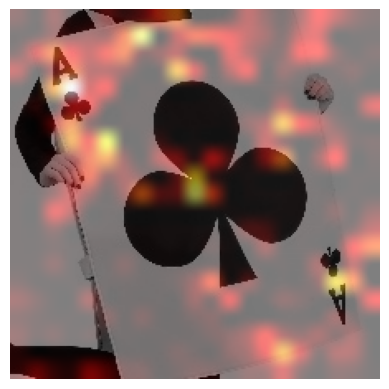

In [16]:
# Remove last layer's softmax
if cnn_model.layers[-1].activation is not None : cnn_model.layers[-1].activation = None

# Print what the top predicted class is
pred = np.argmax(cnn_model.predict(np.expand_dims(arr, axis=0)/255.))
print("Predicted:", get_suit(pred))

# Generate class activation heatmap
gradcam_heatmap(arr, cnn_model)

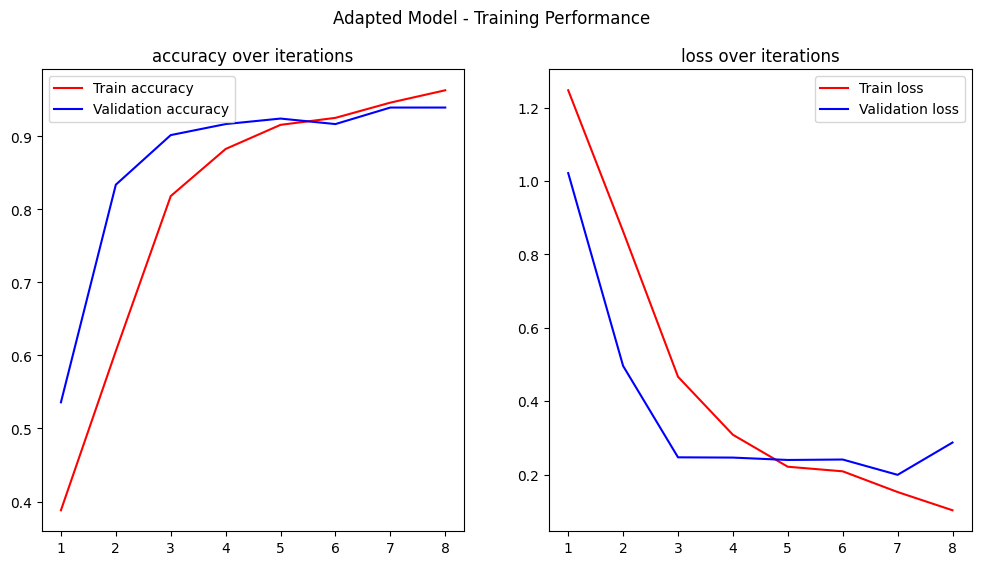

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

					 Total Accuracy (Test Set) = 93.58%
__________________________________________________________________________________________________________ 

Test Set Report
              precision    recall  f1-score   support

       clubs       0.94      0.98      0.96        65
    diamonds       0.94      0.91      0.92        65
      hearts       0.91      0.89      0.90        65
       joker       0.67      0.80      0.73         5
      spades       0.98      0.97      0.98        65

    accuracy                           0.94       265
   macro avg       0.89      0.91      0.90       265
weighted avg       0.94      0.94      0.94       265

__________________________________________________________________________________________________________ 



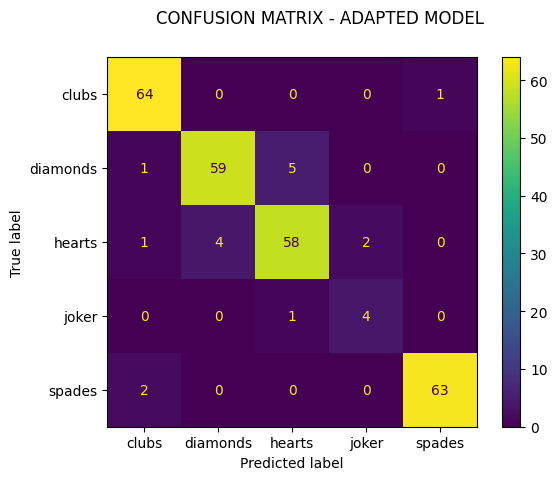

In [17]:
# Visualizing training performance
nn_results_visualizer(baseline_hist, True, title='Adapted Model - Training Performance')

# Printing classification report using x_test set
results_report(cnn_model, title='CONFUSION MATRIX - ADAPTED MODEL')

*PRE-TRAINED MODELS - KERAS APPLICATIONS*

Image array shape =  (224, 224, 3)


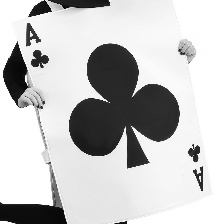

In [18]:
# 3-channel array that will be used to train the pre-trained models

image = Image.open(df_info.loc[0,'filepaths']).convert('L')
img = Image.fromarray(np.uint8(image))

arr = np.array(img)
arr = np.expand_dims(arr, axis=0).reshape((224,224,1))
rgb_batch = np.repeat(arr, 3, -1)

print('Image array shape = ',rgb_batch.shape)

Image.fromarray(rgb_batch)

*INCEPTION*

In [19]:
def inception_model():  
    input = Input(shape=(224,224,1))
    img_conc = Concatenate()([input, input, input])  
    inception = InceptionV3(include_top=False,
                            weights="imagenet",
                            input_tensor=img_conc)
    for layer in inception.layers : layer.trainable = False
    output = inception.output
    output = Flatten()(output)
    output = Dense(5,activation='softmax')(output)
    return Model(input, output, name='inception')

#inception_model().summary()

In [ ]:
inception = inception_model()

inception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

inception_hist = inception.fit(x_train_tl, y_suit['train'], batch_size=128, epochs=3, validation_data=(x_val_tl,y_suit['valid']))

# Dense layers (3 epochs): 
# Time = 9m54s - 10m07s
#Epoch 3/3
#60/60 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.8409 - loss: 0.5055 - val_accuracy: 0.8264 - val_loss: 0.7321

Epoch 1/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.4353 - loss: 8.7197 - val_accuracy: 0.8340 - val_loss: 0.6461
Epoch 2/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.8058 - loss: 0.7255 - val_accuracy: 0.8264 - val_loss: 0.5999
Epoch 3/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.8409 - loss: 0.5055 - val_accuracy: 0.8264 - val_loss: 0.7321


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: hearts
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


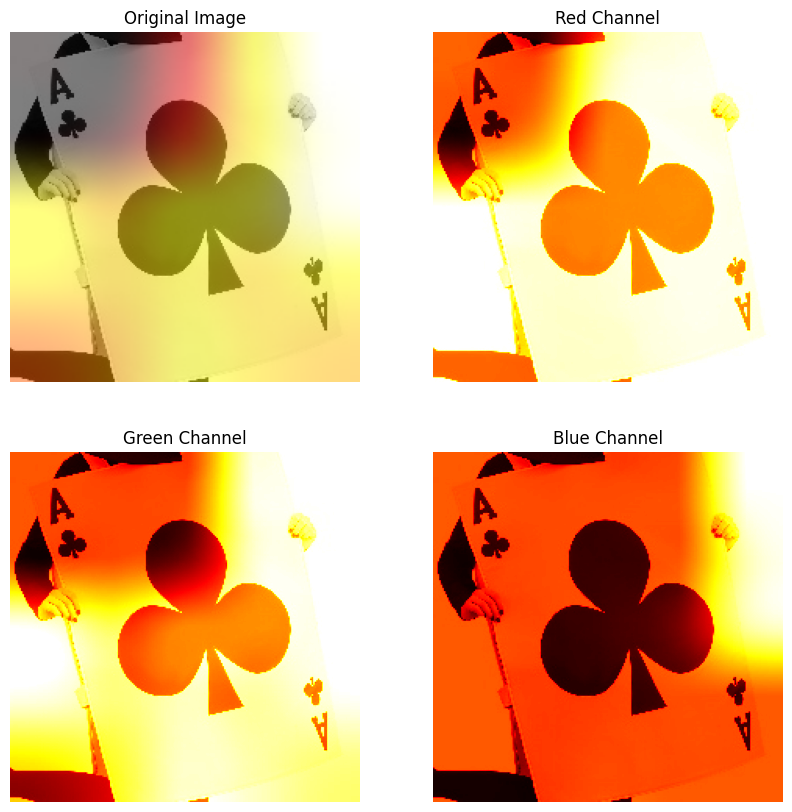

In [21]:
# Remove last layer's softmax
if inception.layers[-1].activation is not None : inception.layers[-1].activation = None

# Print what the top predicted class is
pred = np.argmax(inception.predict(apps.inception_v3.preprocess_input(np.copy(arr.reshape(1,224,224,1)))))
print("Predicted:", get_suit(pred))

# Display Image with GradCam applied
gradcam_heatmap(arr, inception)

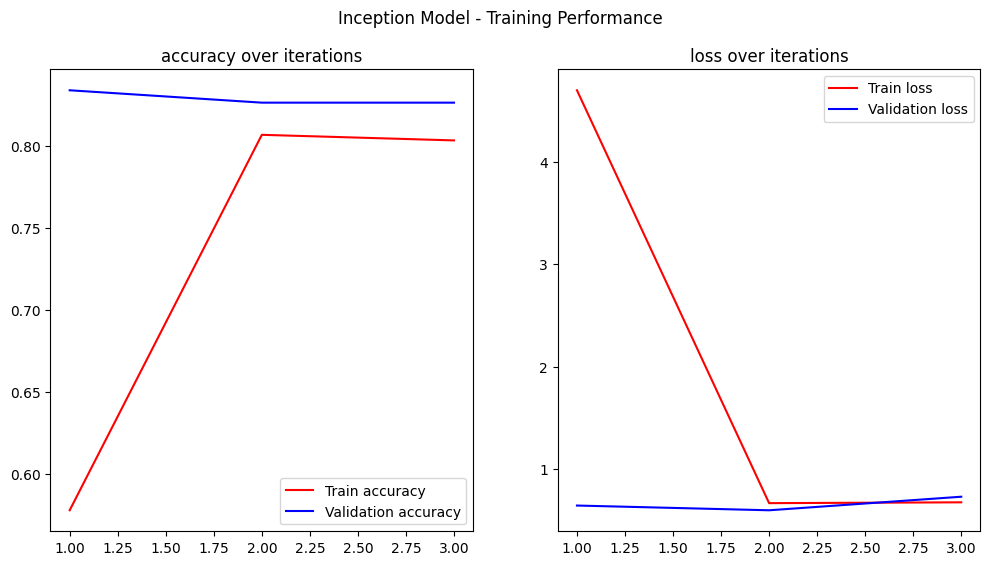

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 725ms/step

					 Total Accuracy (Test Set) = 77.36%
__________________________________________________________________________________________________________ 

Test Set Report
              precision    recall  f1-score   support

       clubs       0.96      0.75      0.84        65
    diamonds       0.91      0.75      0.82        65
      hearts       0.62      0.97      0.76        65
       joker       0.00      0.00      0.00         5
      spades       0.75      0.68      0.71        65

    accuracy                           0.77       265
   macro avg       0.65      0.63      0.63       265
weighted avg       0.79      0.77      0.77       265

__________________________________________________________________________________________________________ 



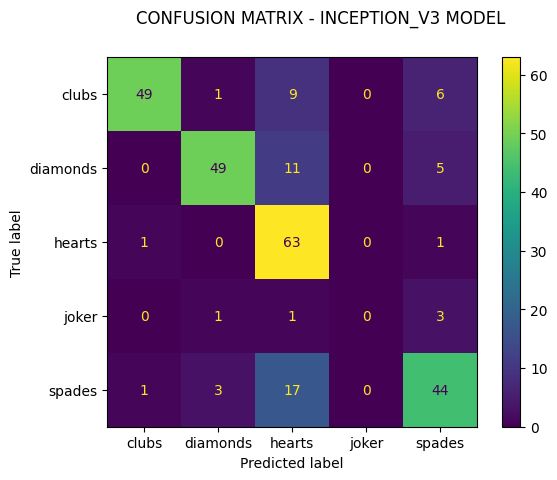

In [22]:
# Visualizing training performance
nn_results_visualizer(inception_hist,True,title='Inception Model - Training Performance')

# Printing classification report using x_test
results_report(inception,title='CONFUSION MATRIX - INCEPTION_V3 MODEL')

*RESNET*

In [23]:
def resnet_model():
    input = Input(shape=(224,224,1))
    img_conc = Concatenate()([input, input, input])  
    resnet = ResNet50V2(include_top=False,
                        weights="imagenet",
                        input_tensor=img_conc)
    for layer in resnet.layers : layer.trainable = False
    output = resnet.output
    output = Flatten()(output)
    output = Dense(5,activation='softmax')(output)
    return Model(input, output, name='resnet')

#resnet_model().summary()

In [ ]:
resnet = resnet_model()

resnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

resnet_hist = resnet.fit(x_train_tl, y_suit['train'], batch_size=128, epochs=3, validation_data=(x_val_tl,y_suit['valid']))

# Dense layers (3 epochs): 
# Time = 13m45s - 14m6s
# Epoch 3/3
# 60/60 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.9689 - loss: 0.1359 - val_accuracy: 0.9132 - val_loss: 0.6194

Epoch 1/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.5861 - loss: 4.6381 - val_accuracy: 0.9019 - val_loss: 0.8944
Epoch 2/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.9169 - loss: 0.5636 - val_accuracy: 0.9094 - val_loss: 0.7523
Epoch 3/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 275s 5s/step - accuracy: 0.9503 - loss: 0.2260 - val_accuracy: 0.9057 - val_loss: 0.7607


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: clubs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


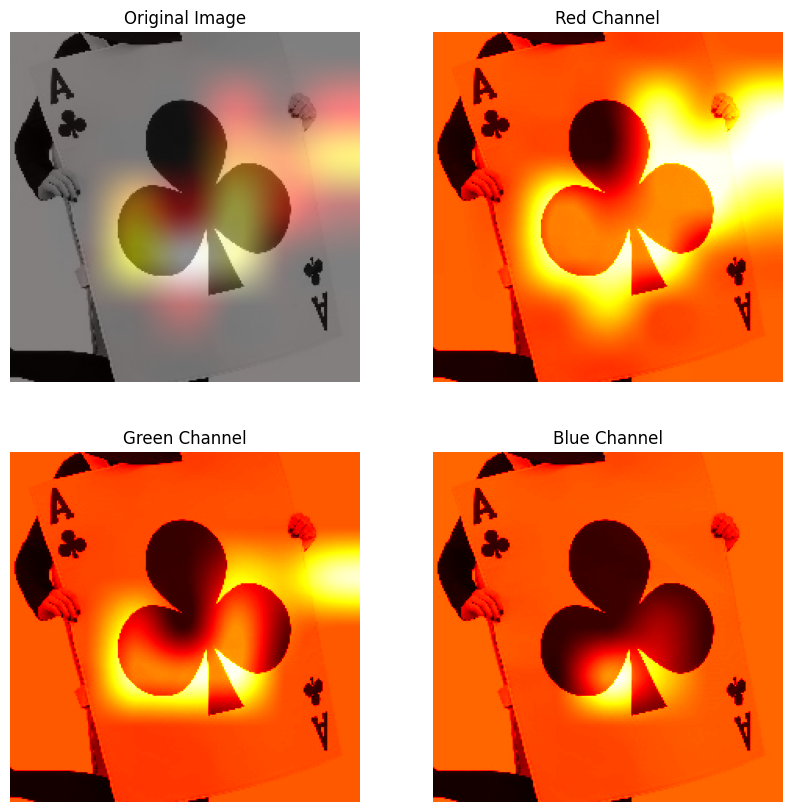

In [25]:
# Remove last layer's softmax
if resnet.layers[-1].activation is not None : resnet.layers[-1].activation = None

# Print what the top predicted class is
pred = np.argmax(resnet.predict(apps.resnet_v2.preprocess_input(np.copy(arr.reshape(1,224,224,1)))))
print("Predicted:", get_suit(pred))

# Display Image with GradCam applied
gradcam_heatmap(arr, resnet)

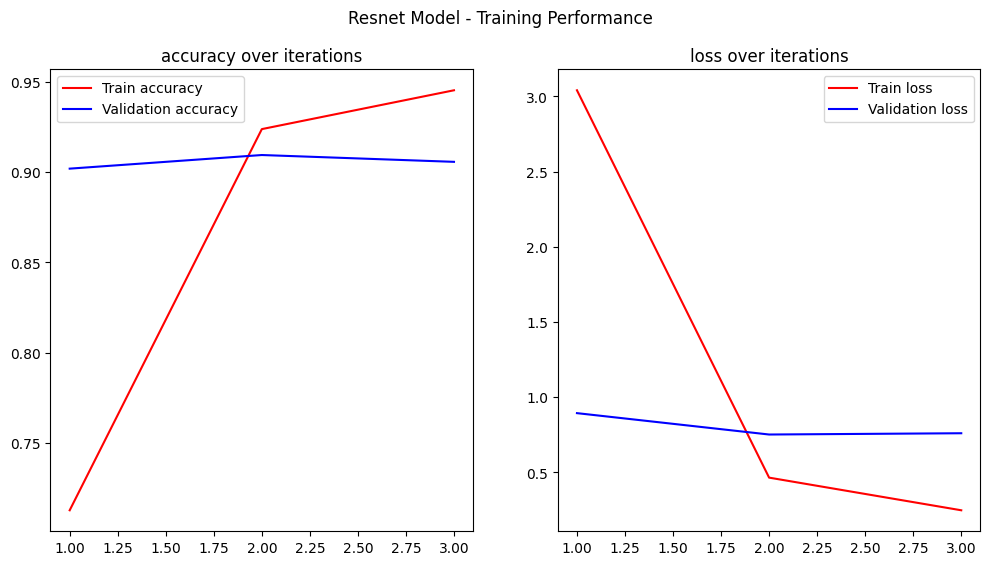

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step

					 Total Accuracy (Test Set) = 87.55%
__________________________________________________________________________________________________________ 

Test Set Report
              precision    recall  f1-score   support

       clubs       0.77      0.97      0.86        65
    diamonds       0.92      0.89      0.91        65
      hearts       0.88      0.89      0.89        65
       joker       0.00      0.00      0.00         5
      spades       1.00      0.82      0.90        65

    accuracy                           0.88       265
   macro avg       0.71      0.71      0.71       265
weighted avg       0.88      0.88      0.87       265

__________________________________________________________________________________________________________ 



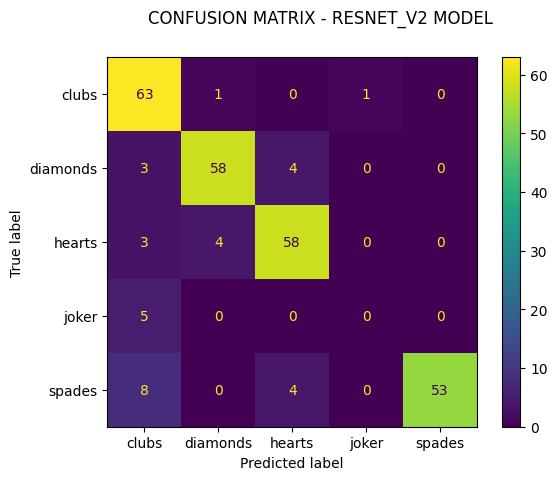

In [26]:
# Visualizing training performance
nn_results_visualizer(resnet_hist,True,title='Resnet Model - Training Performance')

# Printing classification report using x_test
results_report(resnet,title='CONFUSION MATRIX - RESNET_V2 MODEL')

*HYPERPARAMETER-TUNED MODEL*

In [27]:
def hp_model(bloc=1, filt=4, kern=3, strd=1, padd=False, pool=2, dens=64, opt='adam'):

    # Hyperparameter model with custom settings
    # bloc = Nº of blocks (CONV2D + MAXPOOL) present in the model
    # filt = Nº of filters in the convlutional layer
    # kern = Conv2d layer kernel size (given k, it is defined in 2D as k x k)
    # strd = Srides lenght of the convolutional layer (given s, it is defined in 2D as s x s)
    # padd = Include padding (True/False)
    # pool = MaxPooling2D layer kernel size (given p, it is defined in 2D as p x p)
    # dens = Nº of perceptrons preceding the final layer

    if padd is True : pad = 'same'
    else : pad = 'valid'

    input = Input(shape=(224,224,1))

    if bloc == 1:

        conv1 = Conv2D(filters=filt,kernel_size=(kern,kern),strides=(strd,strd),padding=pad,activation='relu') (input)

        maxpool1 = MaxPooling2D(pool_size=(pool,pool)) (conv1)

        flat = Flatten() (maxpool1)
    
    else:

        convs = []; pools = []
        for i in range(bloc):
            if i == 0:
                convs.append(Conv2D(filters=filt,kernel_size=(kern,kern),strides=(strd,strd),padding=pad,activation='relu') (input))
            else:
                convs.append(Conv2D(filters=filt,kernel_size=(kern,kern),strides=(strd,strd),padding=pad,activation='relu') (pools[-1]))
            pools.append(MaxPooling2D(pool_size=(pool,pool)) (convs[-1]))
            
        flat = Flatten() (pools[-1])

    relu = Dense(dens,activation='relu') (flat)

    output = Dense(5,activation='softmax') (relu)

    model = Model(input, output)

    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [28]:
# Parameters we want to search using 'hp_model' function - TOTAL COMBINATIONS = 2^6 + 3^3 = 1728

searching = False

if searching:
    
    params = dict(model__filt=[2,4,6], model__kern=[3,5], model__padd=[True,False],\
                model__dens=[32,48,64], model__pool=[2,3], model__strd=[1,2],\
                model__bloc=[2,3], model__opt=[Adam(),RMSprop()], batch_size=[64,128,256],\
                epochs=[8])

    # =~ 70 minutos
    results = hyperparam_search(hp_model, params, x_train, y_suit['train'], cv=3, max_comb=20)

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']

    print('\n',"Best mean cross-validated score: {} using {}".format(round(results.best_score_,3), results.best_params_))
    print('__________________________________________________________________________________________________________','\n')

    for mean, stdev, param in zip(means, stds, params):
        print("Mean cross-validated score: {} ({}) using: {}".format(round(mean,3), round(stdev,3), param))

# TOP 3 RESULTS IN FIRST SEARCH

#Mean cross-validated score: 0.673 (0.051) using: {'optimizer': <keras.src.optimizers.adam.Adam object at 0x00000254273565D0>, 'model__strd': 1, 'model__pool': 3, 'model__padd': False, 'model__kern': 3, 'model__filt': 6, 'model__dens': 48, 'model__bloc': 3, 'epochs': 8, 'batch_size': 64}

#Mean cross-validated score: 0.618 (0.031) using: {'optimizer': <keras.src.optimizers.adam.Adam object at 0x00000254273565D0>, 'model__strd': 1, 'model__pool': 2, 'model__padd': True, 'model__kern': 3, 'model__filt': 4, 'model__dens': 32, 'model__bloc': 3, 'epochs': 8, 'batch_size': 256}

#Mean cross-validated score: 0.605 (0.053) using: {'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x0000025427362A50>, 'model__strd': 1, 'model__pool': 3, 'model__padd': True, 'model__kern': 3, 'model__filt': 6, 'model__dens': 48, 'model__bloc': 2, 'epochs': 8, 'batch_size': 128}


In [29]:
searching = False

if searching:

    params = dict(model__filt=[4,6], model__kern=[3], model__padd=[True,False],\
                model__dens=[48,64], model__pool=[2,3], model__strd=[1],\
                model__bloc=[2,3], model__opt=[Adam(),RMSprop()], batch_size=[128,256],\
                epochs=[8])

    # =~ 100 minutos
    results = hyperparam_search(hp_model, params, x_train, y_suit['train'], max_comb=20)

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']

    print('\n',"Best mean cross-validated score: {} using {}".format(round(results.best_score_,3), results.best_params_))
    print('__________________________________________________________________________________________________________','\n')

    for mean, stdev, param in zip(means, stds, params):
        print("Mean cross-validated score: {} ({}) using: {}".format(round(mean,3), round(stdev,3), param))

# TOP 3 RESULTS IN SECOND SEARCH

#Mean cross-validated score: 0.679 (0.037) using: {'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x0000016A8CB32A90>, 'model__strd': 1, 'model__pool': 2, 'model__padd': True, 'model__kern': 3, 'model__filt': 6, 'model__dens': 48, 'model__bloc': 3, 'epochs': 8, 'batch_size': 128}

#Mean cross-validated score: 0.65 (0.045) using: {'optimizer': <keras.src.optimizers.rmsprop.RMSprop object at 0x0000016A8CB32A90>, 'model__strd': 1, 'model__pool': 2, 'model__padd': True, 'model__kern': 3, 'model__filt': 6, 'model__dens': 48, 'model__bloc': 3, 'epochs': 8, 'batch_size': 256}

#Mean cross-validated score: 0.64 (0.037) using: {'optimizer': <keras.src.optimizers.adam.Adam object at 0x0000016A8CB9EE10>, 'model__strd': 1, 'model__pool': 2, 'model__padd': True, 'model__kern': 3, 'model__filt': 4, 'model__dens': 32, 'model__bloc': 3, 'epochs': 8, 'batch_size': 128}


In [30]:
# Printing best parameters found in hyperparameters research
#print('PARAMETERS OF THE CHOSEN MODEL')
#print([(p.split('model__')[-1],v) for p,v in results.best_params_.items()],'\n')

# Model with the selected setting
hyperpar_model = hp_model(bloc=3,strd=1,pool=2,padd=True,kern=3,filt=6,dens=48,opt=RMSprop())

hyperpar_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 224, 224, 6)    │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 112, 112, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 112, 112, 6)    │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 56, 56, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 56, 56, 6)      │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 28, 28, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 48)             │       225,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,805 (885.96 KB)

 Trainable params: 226,805 (885.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.3447 - loss: 1.4057 - val_accuracy: 0.5245 - val_loss: 1.0531
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.5666 - loss: 1.0588 - val_accuracy: 0.6038 - val_loss: 0.8946
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.6469 - loss: 0.9145 - val_accuracy: 0.6340 - val_loss: 0.8704
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.6968 - loss: 0.7843 - val_accuracy: 0.7472 - val_loss: 0.6458
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.7524 - loss: 0.6616 - val_accuracy: 0.7736 - val_loss: 0.5935
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.7925 - loss: 0.5704 - val_accuracy: 0.7811 - val_loss: 0.5565
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.8276 - loss: 0.4887 - val_accuracy: 0.8038 - val_loss: 0.5277
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.8573 - loss: 0.4228 - val_accu

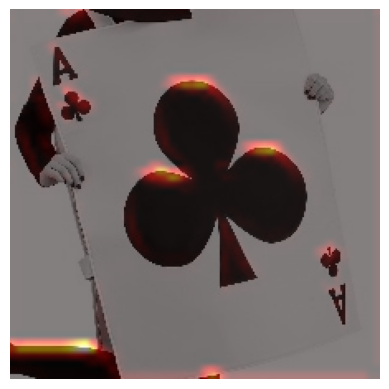

In [ ]:
# Hyperparameter-tuned Model training
hyperpar_hist = hyperpar_model.fit(x_train, y_suit['train'], batch_size=128, epochs=12, validation_data=(x_val,y_suit['valid']))

# Remove last layer's softmax
if hyperpar_model.layers[-1].activation is not None : hyperpar_model.layers[-1].activation = None

# Print what the top predicted class is
pred = np.argmax(hyperpar_model.predict(np.expand_dims(arr, axis=0)/255.))
print("Predicted:", get_suit(pred))

# Generate class activation heatmap
gradcam_heatmap(arr, hyperpar_model)

# 12 epochs: 
# Time = 2m12s - 2m20s
#Epoch 12/12
#60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9277 - loss: 0.2248 - val_accuracy: 0.8453 - val_loss: 0.4931

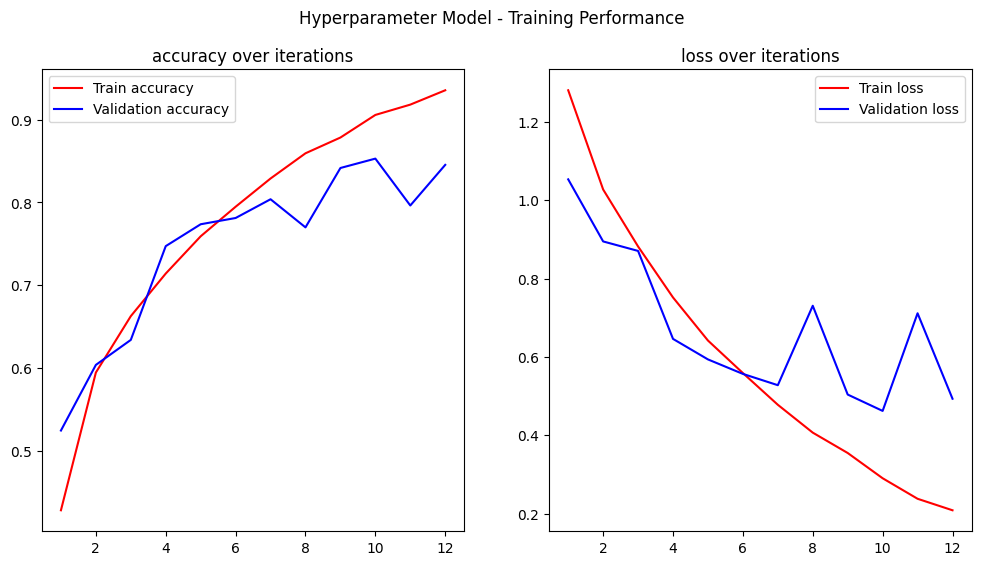

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

					 Total Accuracy (Test Set) = 84.53%
__________________________________________________________________________________________________________ 

Test Set Report
              precision    recall  f1-score   support

       clubs       0.87      0.92      0.90        65
    diamonds       0.84      0.78      0.81        65
      hearts       0.81      0.88      0.84        65
       joker       0.80      0.80      0.80         5
      spades       0.87      0.80      0.83        65

    accuracy                           0.85       265
   macro avg       0.84      0.84      0.84       265
weighted avg       0.85      0.85      0.84       265

__________________________________________________________________________________________________________ 



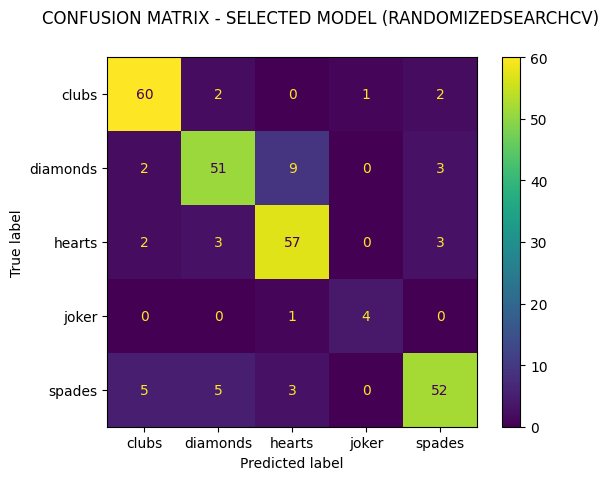

In [32]:
# Visualizing training performance
nn_results_visualizer(hyperpar_hist, True, title='Hyperparameter Model - Training Performance')

# Printing classification report using x_test
results_report(hyperpar_model, title='CONFUSION MATRIX - SELECTED MODEL (RANDOMIZEDSEARCHCV)')

**Final tests with best-selected model: Adapted Model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


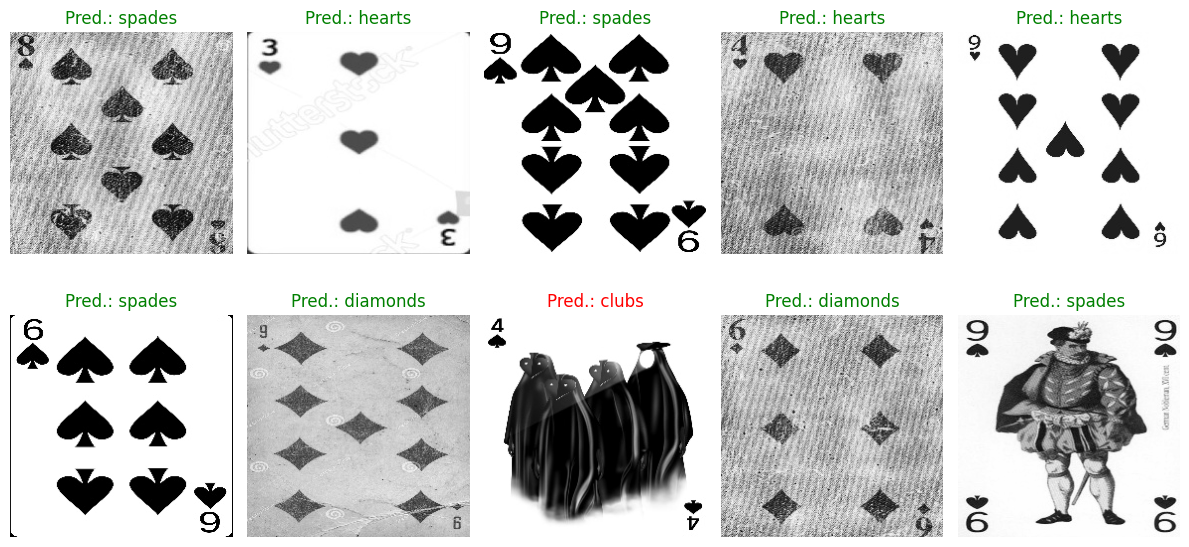

Test Images Accuracy = 90.0 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


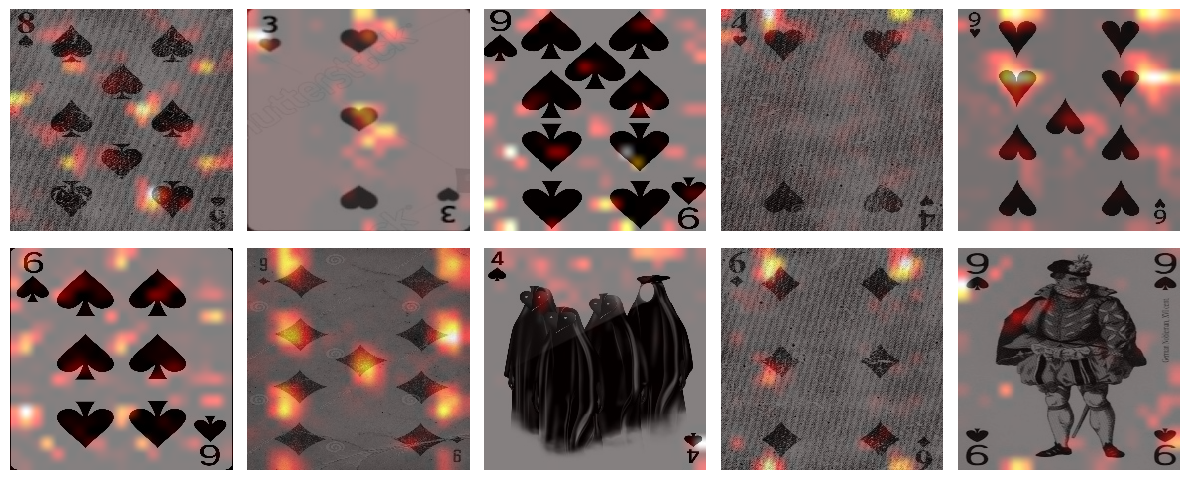

In [18]:
# Plotting saved array as image

test_list = np.random.randint(250,size=10); acc = 0

plt.figure(figsize=(12,7))
for i,n in enumerate(test_list):
    # Predictions printed on screen
    pred_ind = np.argmax(cnn_model.predict(np.expand_dims(x_test[n], axis=0)))
    corr_ind = np.argmax(y_suit['test'][n]); color = 'r'
    if pred_ind == corr_ind : 
        color = 'g'
        acc += 1
    # Image that will be predicted
    plt.subplot(2,5,i+1)
    plt.title(f'Pred.: {get_suit(pred_ind)}',color=color)
    plt.axis("off")
    plt.imshow(x_test[n], cmap='gray')
    plt.tight_layout()

plt.show()
print('Test Images Accuracy =',(acc/len(test_list))*100,'%')

plt.figure(num=0,figsize=(12,5))
for i,n in enumerate(test_list):
    plt.subplot(2,5,i+1)
    plt.matshow(gradcam_heatmap(x_test[n], cnn_model, get_heatmap=True),fignum=0,cmap='gray')
    plt.axis('off')
    plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


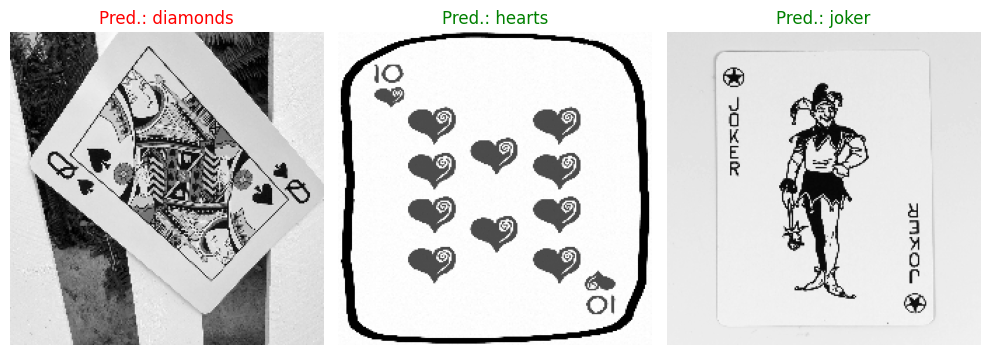

Downloaded Images Accuracy = 66.67 %


In [19]:
# images from: https://www.publicdomainpictures.net/

cards_list = ['queen_spades','ten_hearts','joker']
plt.figure(figsize=(10,4)); acc = 0

for i,card in enumerate(cards_list):
    image = Image.open(getcwd()+'//web//'+card+'.jpg').convert('RGB')
    img = Image.fromarray(np.uint8(image)).convert('L')
    img = img.resize((224, 224),0)
    arr = np.array(img) / 255.0
    arr = np.expand_dims(np.expand_dims(arr, axis=0),axis=0).reshape(1,224,224,1)
    prediction = cnn_model.predict(arr)
    label = get_suit(np.argmax(prediction))
    plt.subplot(1,len(cards_list),i+1)
    if card.split('_')[-1] == label : 
        color = 'g'
        acc += 1
    else : color = 'r'
    plt.title(f'Pred.: {label}',color=color)
    plt.axis("off")
    plt.imshow(arr[0].reshape(224,224), cmap='gray')

plt.tight_layout()
plt.show()
print('Downloaded Images Accuracy =',round((acc/len(cards_list))*100,2),'%')

**Model Variations**

*Adapted Model using Data Augmentation*

In [15]:
# Using Data Augmentation techniques with normalization to test the first variation
aug_train, aug_test, aug_val = augmented_dataset()
aug_train = norm(aug_train)
aug_test = norm(aug_test)
aug_val = norm(aug_val)

for ds in np.unique(df_info['data set']):
    if ds == 'train':
        y_aug_train = np.append(to_categorical(df_info.loc[df_info['data set']==ds,'suit'],5),\
        np.array([[0., 0., 0., 1., 0.] for _ in range(len(x_train),len(aug_train))]),axis=0)
    elif ds == 'test':
        y_aug_test = np.append(to_categorical(df_info.loc[df_info['data set']==ds,'suit'],5),\
        np.array([[0., 0., 0., 1., 0.] for _ in range(len(x_test),len(aug_test))]),axis=0)
    elif ds == 'valid':
        y_aug_val = np.append(to_categorical(df_info.loc[df_info['data set']==ds,'suit'],5),\
        np.array([[0., 0., 0., 1., 0.] for _ in range(len(x_val),len(aug_val))]),axis=0)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.2610 - loss: 1.7134 - val_accuracy: 0.4105 - val_loss: 1.2119
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4984 - loss: 1.1245 - val_accuracy: 0.7825 - val_loss: 0.6400
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7214 - loss: 0.7060 - val_accuracy: 0.8316 - val_loss: 0.4632
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7971 - loss: 0.5263 - val_accuracy: 0.8491 - val_loss: 0.5187
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.8380 - loss: 0.4203 - val_accuracy: 0.8421 - val_loss: 0.6311
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8633 - loss: 0.3533 - val_accuracy: 0.8877 - val_loss: 0.4554
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8815 - loss: 0.3062 - val_accuracy: 0.8351 - val_loss: 0.6600
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9094 - loss: 0.2562 - val_accuracy: 0.8561 - v

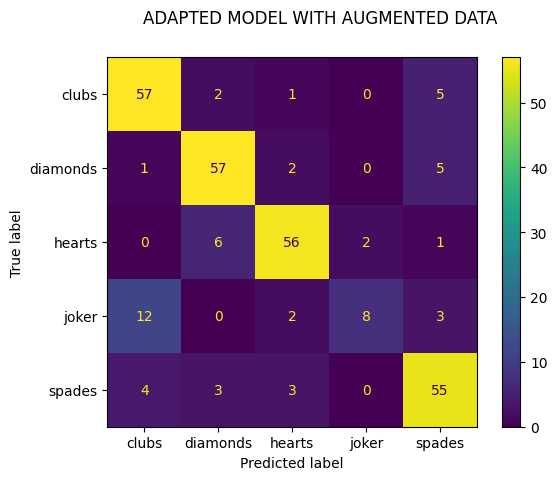

In [16]:
# Adapted model using augmented data (only applied for joker)

cnn_model_aug = adapted_model(opt=Adam(5e-3))
cnn_model_aug.fit(aug_train, y_aug_train, batch_size=128, epochs=10, validation_data=(aug_val, y_aug_val))
results_report(cnn_model_aug, title='ADAPTED MODEL WITH AUGMENTED DATA', augmentation=True)

*Adapted Model using Transfer Learning*

Epoch 1/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.2680 - loss: 1.5458 - val_accuracy: 0.4423 - val_loss: 1.1491
Epoch 2/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.4309 - loss: 1.1207 - val_accuracy: 0.5923 - val_loss: 0.8479
Epoch 3/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.5959 - loss: 0.8397 - val_accuracy: 0.8154 - val_loss: 0.4459
Epoch 4/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8017 - loss: 0.4832 - val_accuracy: 0.9231 - val_loss: 0.2238
Epoch 5/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8660 - loss: 0.3264 - val_accuracy: 0.9269 - val_loss: 0.1708
Epoch 6/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9003 - loss: 0.2570 - val_accuracy: 0.9346 - val_loss: 0.1335
Epoch 7/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9286 - loss: 0.1830 - val_accuracy: 0.9308 - val_loss: 0.1513
Epoch 8/8
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9411 - loss: 0.1481 - val_accuracy: 0.9423 - val_los

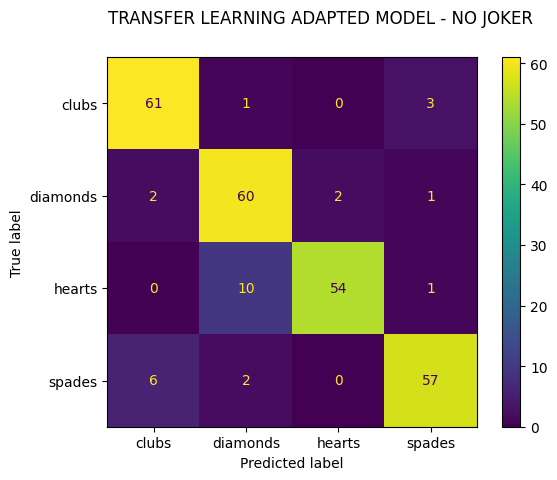

Epoch 1/4
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8884 - loss: 0.4405 - val_accuracy: 0.9053 - val_loss: 0.4519
Epoch 2/4
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9494 - loss: 0.1573 - val_accuracy: 0.9298 - val_loss: 0.5114
Epoch 3/4
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9661 - loss: 0.1018 - val_accuracy: 0.9298 - val_loss: 0.6335
Epoch 4/4
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9791 - loss: 0.0678 - val_accuracy: 0.8947 - val_loss: 0.8118
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

					 Total Accuracy (Test Set) = 86.04%
__________________________________________________________________________________________________________ 

Test Set Report
              precision    recall  f1-score   support

       clubs       0.74      0.94      0.83        65
    diamonds       0.87      0.91      0.89        65
      hearts       0.93      0.88      0.90        65
       joker       1.00      0.60      0.75         5
      spades       0

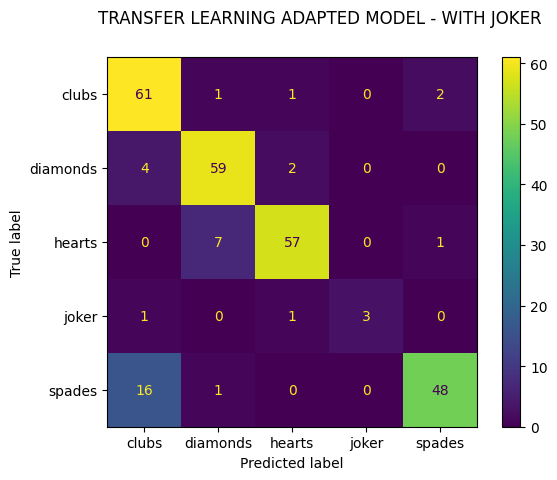

In [16]:
# Transfer Learning Test with Adapted Model

no_joker_trn, no_joker_tes, no_joker_val = np.where(y_suit['train'][:,3]==0)[0], np.where(y_suit['test'][:,3]==0)[0], np.where(y_suit['valid'][:,3]==0)[0]
#joker_trn, joker_tes, joker_val = np.where(y_suit['train'][:,3]==1)[0], np.where(y_suit['test'][:,3]==1)[0], np.where(y_suit['valid'][:,3]==1)[0]

cnn_model = adapted_model(opt=Adam(5e-3))
cnn_model.fit(x_train[no_joker_trn], y_suit['train'][no_joker_trn], batch_size=128, epochs=8, validation_data=(x_val[no_joker_val],y_suit['valid'][no_joker_val]))
results_report(cnn_model, title='TRANSFER LEARNING ADAPTED MODEL - NO JOKER', transfer_learning=True)

# Only the Dense layers will be trained for joker in the Transfer Learning
for i,l in enumerate(cnn_model.layers):
    if i < 8 : l.trainable = False

cnn_model.fit(aug_train, y_aug_train, batch_size=128, epochs=4, validation_data=(aug_val,y_aug_val))
results_report(cnn_model, title='TRANSFER LEARNING ADAPTED MODEL - WITH JOKER')

*ResNet Model using colored images*

In [15]:
# Funtion that reads an image, convert into array and scale it according to ResNet50V2 necessity
def image_resnet_rgb(path):
    image = Image.open(path).convert('RGB')
    img = Image.fromarray(np.uint8(image))
    return apps.resnet_v2.preprocess_input(np.array(img).reshape(1,224,224,3))

# Separating files according to theirs data sets
rgb_train = np.empty(shape=(len(x_train),224,224,3))
rgb_test  = np.empty(shape=(len(x_test),224,224,3))
rgb_val   = np.empty(shape=(len(x_val),224,224,3))

for ds in np.unique(df_info['data set']):
    for i,path in tqdm(enumerate(df_info.loc[ df_info['data set']==ds ,'filepaths'])):
        if ds == 'train' : rgb_train[i] = image_resnet_rgb(path)
        elif ds == 'test' : rgb_test[i] = image_resnet_rgb(path)
        elif ds == 'valid' : rgb_val[i] = image_resnet_rgb(path)

265it [00:00, 697.06it/s]
7624it [00:18, 415.01it/s]
265it [00:00, 362.26it/s]


Epoch 1/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.6442 - loss: 3.5771 - val_accuracy: 0.9170 - val_loss: 0.8634
Epoch 2/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 281s 5s/step - accuracy: 0.9239 - loss: 0.4751 - val_accuracy: 0.8491 - val_loss: 1.0047
Epoch 3/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.9442 - loss: 0.3246 - val_accuracy: 0.9396 - val_loss: 0.4566
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step

					 Total Accuracy (Test Set) = 86.42%
__________________________________________________________________________________________________________ 

Test Set Report
              precision    recall  f1-score   support

       clubs       0.90      0.92      0.91        65
    diamonds       0.85      0.88      0.86        65
      hearts       0.80      0.94      0.87        65
       joker       0.00      0.00      0.00         5
      spades       0.94      0.78      0.86        65

    accuracy                           0.86       265
   macro avg       0.70      0.70     

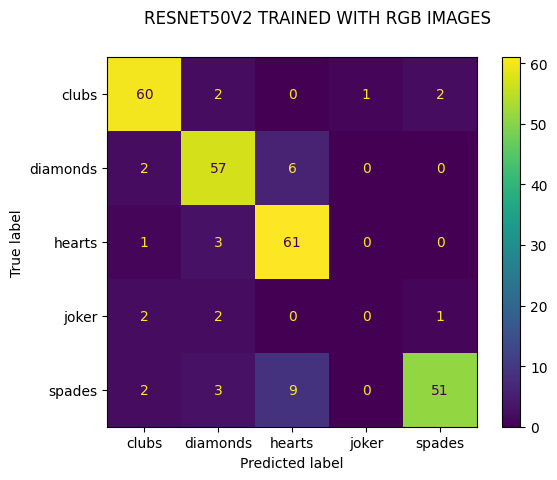

In [16]:
# Function that creates the ResNet50V2 Model with RGB pictures
def resnet_rgb_model():   
    resnet50 = ResNet50V2(include_top=False,
                          input_shape=(224, 224, 3),
                          weights="imagenet")
    for layer in resnet50.layers : layer.trainable = False
    output = resnet50.output
    output = Flatten()(output)
    output = Dense(5,activation='softmax')(output)
    return Model(resnet50.input, output, name='resnet')

# Testing ResNet50V2 with RGB pictures
resnet_rgb = resnet_rgb_model()

resnet_rgb.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

resnet_rgb.fit(rgb_train, y_suit['train'], batch_size=128, epochs=3, validation_data=(rgb_val, y_suit['valid']))

results_report(resnet_rgb, title='RESNET50V2 TRAINED WITH RGB IMAGES ', resnet_rgb=True)